Assignment:
- Generate regression dataset using make_regression from sklearn.datasets (1000 linear samples & 3 features)
- Split the data into (Train & Test)
- Randomly initialize the weights vector
- Implement Loss & gradientDescent functions
    - Hints for GradientDescent:
        - You will stop at a fixed number of iterations (for example 100 iterations) → Print the loss after each 10 iterations
        - Fix the learning rate (for example 0.001) and try to run the code again with different learning rate and check if it will enhance the performance
        - You will update the weights using the training data
- Use the final weights to predict the output of the test data and finally check the performance of your model by calculating the MSE/MAE for the test data “Print MSE/MAE”
- The only built-in functions allowed in this assignment is the split fn. & make_regression. It is not allowed to use any other built-in function in the code.
- You have to implement the gradient descent to update the weights using the equations included in the lecture (Don’t use any other functions based on google search) (You will not get its grade)

In [13]:
# importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [14]:
ds = make_regression(n_samples=1000, n_features=3)
print(ds[0].shape)
print(ds[1].shape)
X = pd.DataFrame(data=ds[0], columns=['X1', 'X2', 'X3'])
y = ds[1]
print(X.head())
print(y[:5])


(1000, 3)
(1000,)
         X1        X2        X3
0 -0.195808  0.936560 -0.244336
1 -0.460805  0.937755  0.729326
2  0.096955  0.397562  0.469016
3  0.479128  1.188039 -0.502734
4  0.158580  1.454131  0.297036
[-14.19628429  61.48319645  48.04671676 -13.76990129  48.9346106 ]


In [15]:
# splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
# initializing weight factors
weights = np.random.rand(X_train.shape[1])
print(weights)

(800, 3) (200, 3)
(800,) (200,)
[0.03714214 0.09884544 0.48163249]


In [16]:
def compute_loss(X, y, weights):
    predictions = np.dot(X, weights)
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

# Example usage
loss = compute_loss(X_train, y_train, weights)
print(f'Initial Loss: {loss}')

Initial Loss: 7713.022738562834


Iteration 0: Loss = 7698.467614882879
Iteration 10: Loss = 7554.423932801638
Iteration 20: Loss = 7413.085040291419
Iteration 30: Loss = 7274.399955472016
Iteration 40: Loss = 7138.318661257124
Iteration 50: Loss = 7004.792087019352
Iteration 60: Loss = 6873.772090605211
Iteration 70: Loss = 6745.211440693358
Iteration 80: Loss = 6619.063799489552
Iteration 90: Loss = 6495.283705751823


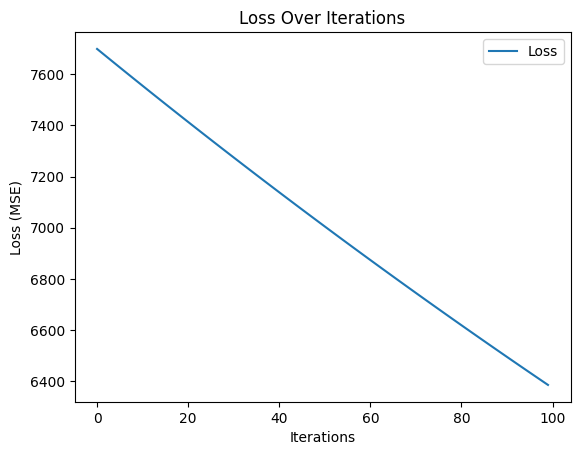

Final Weights: [2.21707951 1.50439465 8.20248846]


In [17]:
def gradient_descent(X, y, weights, learning_rate=0.001, iterations=100):
    losses = []  # List to store loss at each iteration

    for i in range(iterations):
        predictions = np.dot(X, weights)
        errors = predictions - y
        gradient = np.dot(X.T, errors) / len(y)
        weights -= learning_rate * gradient
        
        # Compute and store the loss
        loss = compute_loss(X, y, weights)
        losses.append(loss)  # Save the loss for this iteration

        # Print the loss every 10 iterations
        if i % 10 == 0:
            print(f'Iteration {i}: Loss = {loss}')
    
    # Plot the loss over iterations after the loop ends
    plt.plot(range(iterations), losses, label="Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss (MSE)")
    plt.title("Loss Over Iterations")
    plt.legend()
    plt.show()

    return weights

# Example usage
final_weights = gradient_descent(X_train, y_train, weights, learning_rate=0.001, iterations=100)
print(f'Final Weights: {final_weights}')

In [18]:
# Predicting the output of the test data
y_pred = np.dot(X_test, final_weights)

# Calculating MSE
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

# Calculating MAE
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 6536.285197721028
Mean Absolute Error (MAE): 65.63574428566999


Iteration 0: Loss = 6384.78470764231
Iteration 10: Loss = 6373.952001521555
Iteration 20: Loss = 6363.137740672906
Iteration 30: Loss = 6352.341893569068
Iteration 40: Loss = 6341.564428736855
Iteration 50: Loss = 6330.805314757091
Iteration 60: Loss = 6320.064520264515
Iteration 70: Loss = 6309.342013947695
Iteration 80: Loss = 6298.637764548934
Iteration 90: Loss = 6287.951740864173


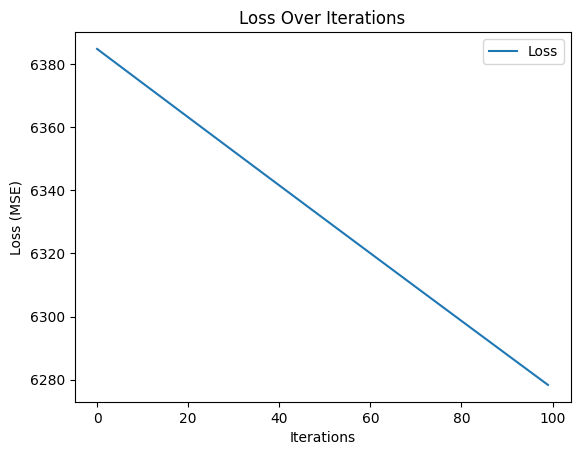

Final Weights: [2.40523212 1.62337335 8.86150012]


In [19]:
final_weights = gradient_descent(X_train, y_train, weights, learning_rate=0.00009, iterations=100)
print(f'Final Weights: {final_weights}')

Iteration 0: Loss = 6160.464919193864
Iteration 10: Loss = 5097.112607825634
Iteration 20: Loss = 4217.8464848802205
Iteration 30: Loss = 3490.6984192110995
Iteration 40: Loss = 2889.270045822492
Iteration 50: Loss = 2391.759007968431
Iteration 60: Loss = 1980.1560543261526
Iteration 70: Loss = 1639.5829005068729
Iteration 80: Loss = 1357.746084347783
Iteration 90: Loss = 1124.4864201942912


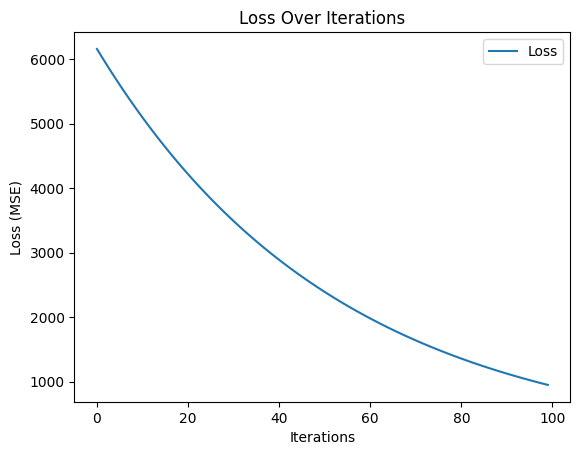

Final Weights: [16.95385195  9.57055274 55.95448808]


In [20]:
final_weights = gradient_descent(X_train, y_train, weights, learning_rate=0.01, iterations=100)
print(f'Final Weights: {final_weights}')

Iteration 0: Loss = 779.5646796583983
Iteration 10: Loss = 109.70631192776591
Iteration 20: Loss = 15.615318738834754
Iteration 30: Loss = 2.2441475655298846
Iteration 40: Loss = 0.32515770370263153
Iteration 50: Loss = 0.04744000605380437
Iteration 60: Loss = 0.006962390161168021
Iteration 70: Loss = 0.0010269825643996128
Iteration 80: Loss = 0.0001521411532673815
Iteration 90: Loss = 2.262275780497285e-05


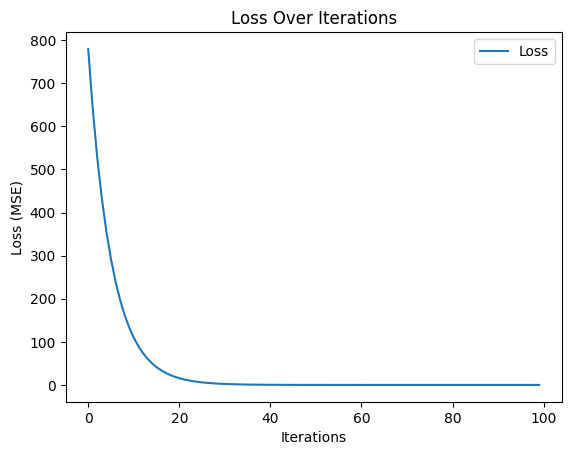

Final Weights: [28.47132702 13.0905997  85.45807846]


In [21]:
final_weights = gradient_descent(X_train, y_train, weights, learning_rate=0.1, iterations=100)
print(f'Final Weights: {final_weights}')